# Clustering Penguins Data

## Importing Libraries

In [28]:
import numpy as np
import pandas as pd 
import plotly.express as px

In [29]:
import plotly.io as pio
pio.renderers.default = "png"

In [30]:
df = pd.read_csv('penguins.csv')

In [31]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [33]:
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

There seems to be some null values, we will drop these values.

In [34]:
df = df.dropna()

In [35]:
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Great, we took care of null values.

In [36]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [37]:
count = (df['sex']=='.').sum()
count

np.int64(1)

In [38]:
df = df[df['sex'] != '.']
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

There was one '.' value in sex column which we removed.

In [39]:
df.shape

(334, 5)

In [40]:
cat_cols = ['sex']
num_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [41]:
df[cat_cols] = df[cat_cols].astype('category')

### Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [43]:
X_cat = OneHotEncoder(drop='first', sparse_output=False).fit_transform(df[cat_cols])
X_num = df[num_cols].values
X = np.hstack((X_num, X_cat))
X_scaled = StandardScaler().fit_transform(X)

## Principle Components Analysis

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [47]:
pca.explained_variance_

array([1.99831442, 1.39946258])

## Clustering

In [53]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

### KMeans

In [54]:
kmeans = KMeans(n_clusters=5, random_state=3, n_init=20)
kmeans_labels = kmeans.fit_predict(X_pca)
kmeans_centers = kmeans.cluster_centers_

In [55]:
kmeans_labels

array([0, 3, 3, 3, 0, 3, 0, 4, 3, 0, 0, 3, 3, 0, 3, 4, 3, 0, 3, 0, 0, 3,
       0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 4, 3, 0, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 4, 3, 0, 3, 0, 3, 0, 3, 4, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 4, 3, 0, 3, 0, 3, 0, 3, 4, 3, 4, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 4, 4, 3, 4, 3, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 2, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 4, 2, 3, 4, 3, 4, 4, 3, 4, 3, 3, 4, 3, 4, 4, 3, 3,
       4, 3, 4, 3, 4, 3, 4, 4, 3, 4, 3, 3, 4, 3, 4, 4, 3, 2, 1, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,

In [62]:
kmeans_score = silhouette_score(X_pca, kmeans_labels)
kmeans_score

0.5942103408257382

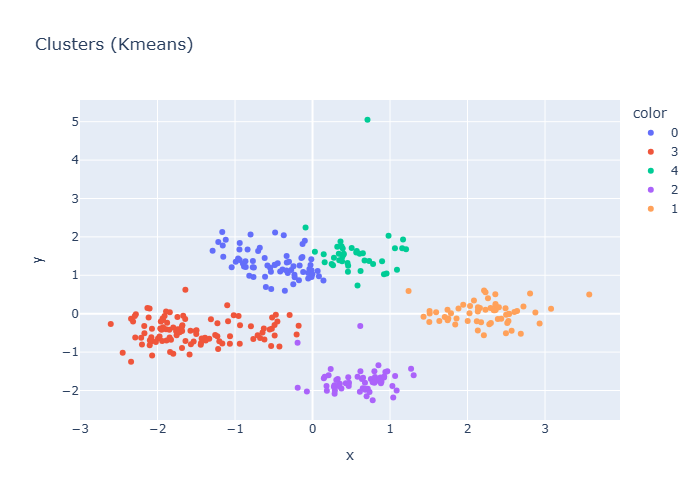

In [59]:
fig = px.scatter(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    color=kmeans_labels.astype(str),
    title='Clusters (Kmeans)'
)
fig.show()

### Hierarchical Clustering (Agglomerative)

In [60]:
agg = AgglomerativeClustering(n_clusters=5, linkage='complete')
agg_labels = agg.fit_predict(X_pca)
agg_score = silhouette_score(X_pca, agg_labels)
agg_score

0.6462239808039608

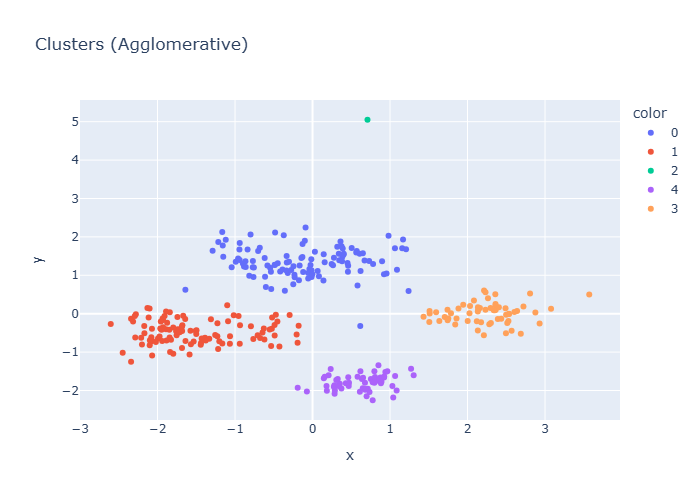

In [61]:
fig = px.scatter(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    color=agg_labels.astype(str),
    title='Clusters (Agglomerative)'
)
fig.show()

### DBSCAN

In [63]:
db = DBSCAN(eps=0.5, min_samples=5)
db_labels = db.fit_predict(X_pca)
db_score = silhouette_score(X_pca, db_labels)
db_score

0.6428423264355191

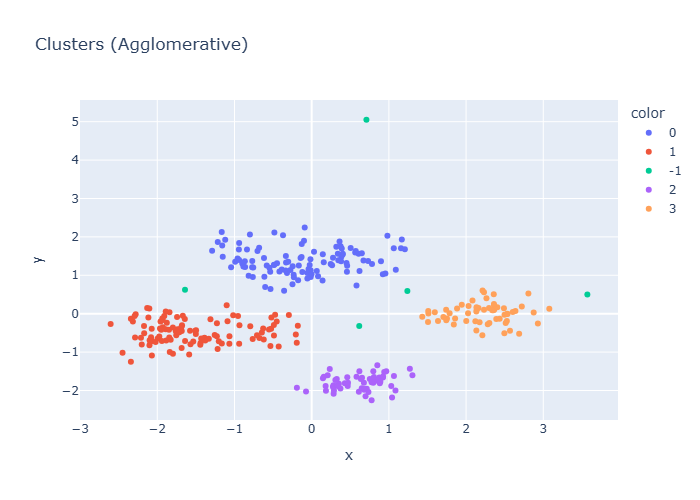

In [64]:
fig = px.scatter(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    color=db_labels.astype(str),
    title='Clusters (Agglomerative)'
)
fig.show()

### MeanShift

In [65]:
ms = MeanShift()
ms_labels = ms.fit_predict(X_pca)
ms_score = silhouette_score(X_pca, ms_labels)
ms_score

0.40407870909329996

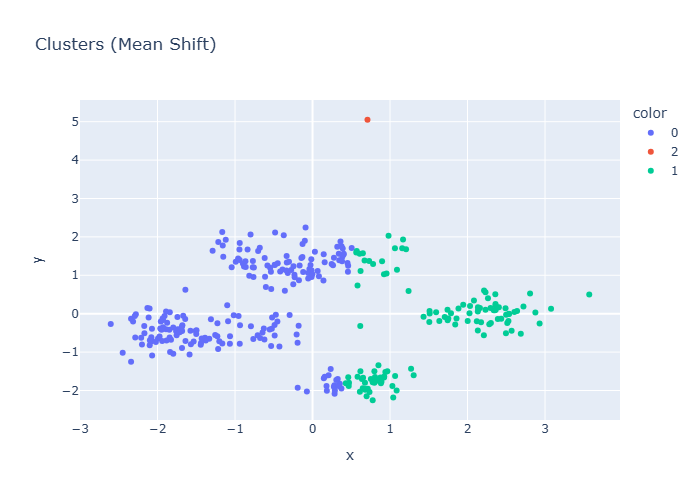

In [66]:
fig = px.scatter(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    color=ms_labels.astype(str),
    title='Clusters (Mean Shift)'
)
fig.show()

## Spectral Clustering

In [71]:
sc = SpectralClustering(n_clusters=5, affinity='nearest_neighbors')
sc_labels = sc.fit_predict(X_pca)
sc_score = silhouette_score(X_pca, sc_labels)
sc_score

c:\Users\yashdeshpande\AppData\Local\Python\pythoncore-3.10-64\lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



0.5906158886830227

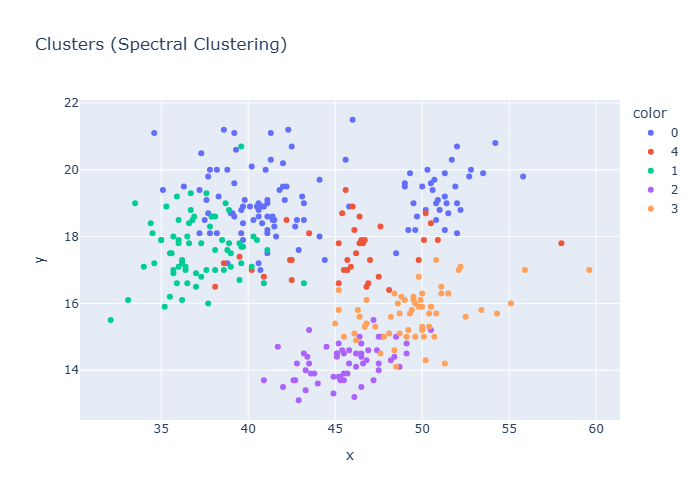

In [72]:
fig = px.scatter(
    x=df['culmen_length_mm'],
    y=df['culmen_depth_mm'],
    color=sc_labels.astype(str),
    title='Clusters (Spectral Clustering)'
)
fig.show()

### Gaussian Mixture Model

In [73]:
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)
probs = gmm.predict_proba(X_pca)

In [74]:
gmm_score = silhouette_score(X_pca, gmm_labels)
gmm_score

0.591233074884063

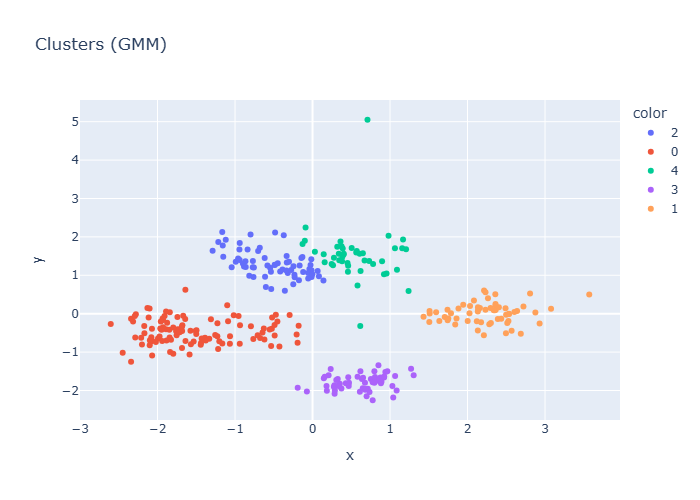

In [75]:
fig = px.scatter(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    color=gmm_labels.astype(str),
    title='Clusters (GMM)'
)
fig.show()